# Иерархический кластерный анализ

Задача кластеризации разделить данные на некоторые классы (причем количество кластеров неизвестно). Ни один алгоритм не способен узнать количество кластеров.
Вместо того, чтобы подбирать количество кластеров, построим иерархию или структуру между данными.
В этой структуре верхние уровни имеют грубое приближение, нижние - детальное представление отдельных объектов.
- Высокие уровни содержат все объекты выборки.
- Низкие уровни набор одиночних кластеров (объекту соответсвует некоторый кластер).

Алгоритм кластеризации:
- идти сверху вниз начиная с одного кластера для всех элементов и делить их рекурсивно.
- идти снизу, считая, что каждый объект кластер и объединять их по некоторому критерию.

## Агломерационный кластерный алгоритм

In [1]:
from sklearn.cluster.hierarchical import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

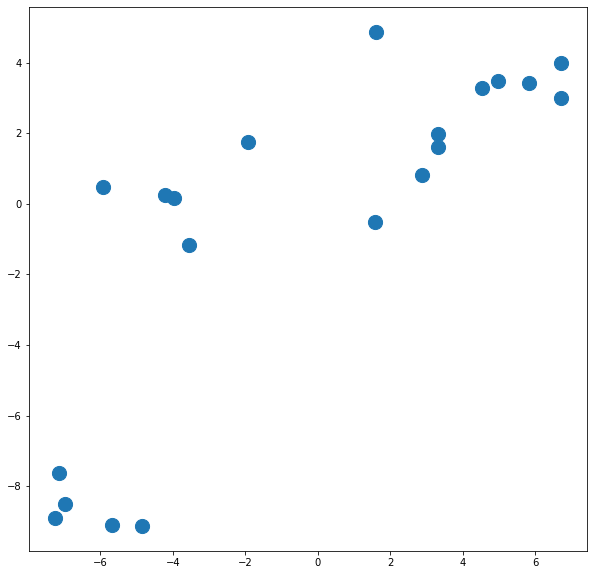

In [2]:
x, y = make_blobs(n_samples=20, n_features=2, centers=4 ,cluster_std=1, random_state=17)
cmap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], s= 200, cmap=cmap)

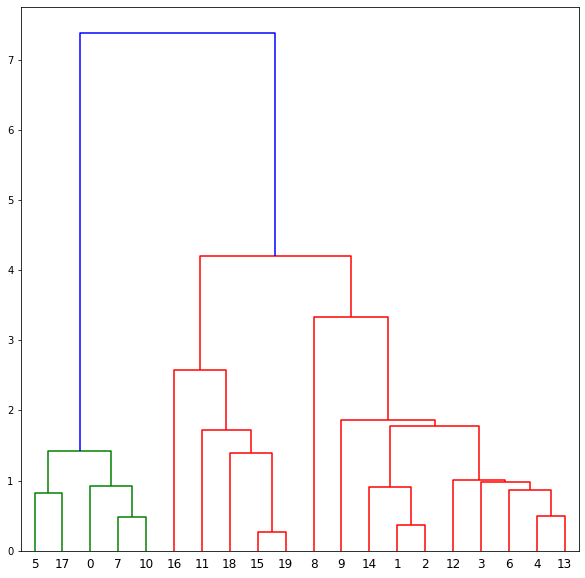

In [3]:
Z = linkage(x)
plt.figure(figsize=(10,10))
dendrogram(Z);

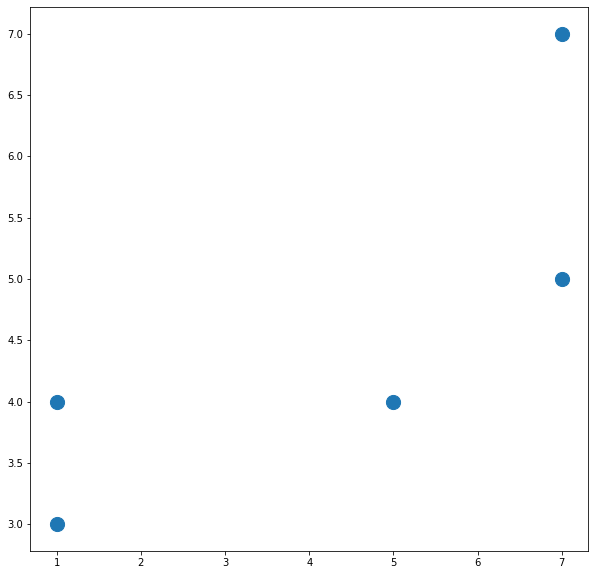

In [4]:
x = np.array([[1,3],[1,4],[5,4],[7,5],[7,7]])
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], s =200)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 2.0, 2.0, 0.0],
  [0.0, 2.23606797749979, 2.23606797749979, 2.0],
  [1.0, 4.0, 4.0, 2.23606797749979]],
 'ivl': ['0', '1', '2', '3', '4'],
 'leaves': [0, 1, 2, 3, 4],
 'color_list': ['g', 'r', 'r', 'b']}

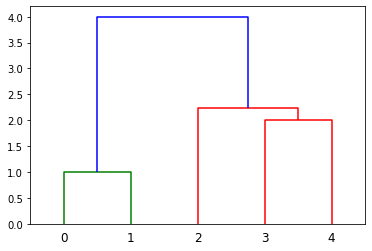

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(x)
dendrogram(Z)

## Сопоставьте картинки

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5]],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 2.0, 2.0, 1.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 2.8284271247461903, 2.8284271247461903, 1.0],
  [2.0, 4.242640687119285, 4.242640687119285, 2.8284271247461903]],
 'ivl': ['5', '3', '4', '2', '0', '1'],
 'leaves': [5, 3, 4, 2, 0, 1],
 'color_list': ['g', 'g', 'r', 'r', 'b']}

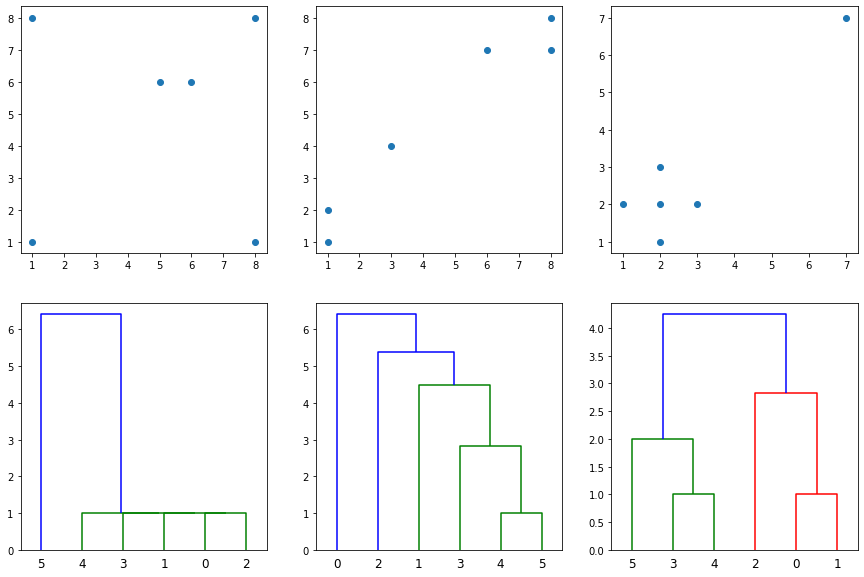

In [6]:
arr_1 = np.array([[1,1],[1,8],[8,1],[8,8],[6,6],[5,6]])
arr_2 = np.array([[1,1],[1,2],[3,4],[8,8],[8,7],[6,7]])
arr_3 = np.array([[1,2],[2,1],[2,2],[2,3],[3,2],[7,7]])
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.scatter(arr_1[:,0], arr_1[:,1])
plt.subplot(232)
plt.scatter(arr_2[:,0], arr_2[:,1])
plt.subplot(233)
plt.scatter(arr_3[:,0], arr_3[:,1])
plt.subplot(234)
dendrogram(linkage(arr_3))
plt.subplot(235)
dendrogram(linkage(arr_1))
plt.subplot(236)
dendrogram(linkage(arr_2))

## Кластерное расстояние

- Одинарная связь: минимальное расстояние между объектами кластеров.

\begin{equation}
D(c_1, c_2) = \min \limits_{x_1 \in c_1, x_2 \in c_2} D(x_1, x_2)
\end{equation}

- Полная связь: максимальное расстояние между объектами кластеров.

\begin{equation}
D(c_1, c_2) = \max \limits_{x_1 \in c_1, x_2 \in c_2} D(x_1, x_2)
\end{equation}

- Средняя связь: среднее значение по всем попарным расстояним.

\begin{equation}
D(c_1, c_2) = \frac{1}{|c_1|} \frac{1}{|c_2|} \sum \limits_{x_1 \in c_1}, \sum \limits_{x_2 \in c_2} D(x_1, x_2)
\end{equation}

- Центройды: расстояние между центрами масс класстеров.

\begin{equation}
D(c_1, c_2) = D((\frac{1}{|c_1|} \sum \limits_{x_1 \in c_1} x),(\frac{1}{|c_2|} \sum \limits_{x_2 \in c_2} x))
\end{equation}

- Метод Уорда (Ward's method):

\begin{equation}
TD_{c_1 \cup c_2} = \sum \limits_{x \in c_1 \cup c_2} D(x, \mu_{c_1 \cup c_2})^2
\end{equation}

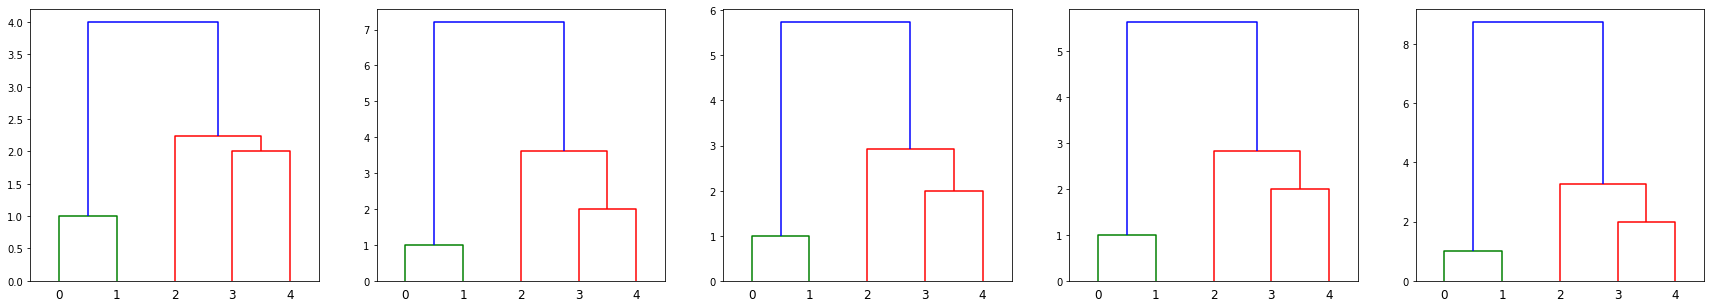

In [7]:
plt.figure(figsize=(30,5))
plt.subplot(151)
Z = linkage(x)
dendrogram(Z);
plt.subplot(152)
Z = linkage(x, method='complete')
dendrogram(Z);
plt.subplot(153)
Z = linkage(x, method='average')
dendrogram(Z);
plt.subplot(154)
Z = linkage(x, method='centroid')
dendrogram(Z);
plt.subplot(155)
Z = linkage(x, method='ward')
dendrogram(Z);

## Алгоритм Ланса-Уильямса
1. инициализировать множество кластеров C1:
$t = 1; C_t = {{x_1}, . . . , {x_ℓ}}$;
2. для всех t = 2, . . . , ℓ (t — номер итерации):
3. найти в $C_{t−1}$ два ближайших кластера:     
$(c_1, c_2) = \arg \min\limits_{c_1 \neq c_2} R(c_1, c_2)$    
$R_t = R(c_1, c_2)$;
4. изъять кластеры $c_1$ и $c_2$, добавить слитый кластер $C_{new} = c_1 \cup c_2$:    
$C_t = C_{t−1} ∪ \{c_{new}\} / {c_1, c_2 }$;
5. для всех S ∈ C_t вычислить расстояние R(c_1, c_2) по формуле Ланса-Уильямса;

\begin{equation}
D_{k,i+j} = \alpha_i D_{k,i} + \alpha D_{k,j} + \beta D_{i,j} + \sigma |D_{k,i} - D_{k,i}|
\end{equation}

<table>
    <tr>
        <td>
Метод
        </td>
        <td>
$\alpha_i$
        </td>
        <td>
$\alpha_j$
        </td>
        <td>
$\beta$
        </td>
        <td>
$\xi$
        </td>
    </tr>
        <tr>
        <td>
Одинарная связь
        </td>
        <td>
0.5
        </td>
        <td>
0.5
        </td>
        <td>
0
        </td>
        <td>
-0.5
        </td>
    </tr>
        <tr>
        <td>
Полная связь
        </td>
        <td>
0.5
        </td>
        <td>
0.5
        </td>
        <td>
0
        </td>
        <td>
0.5
        </td>
    </tr>
        <tr>
        <td>
Среднее
        </td>
        <td>
$\frac{n_i}{n_i+n_j}$
        </td>
        <td>
$\frac{n_j}{n_i+n_j}$
        </td>
        <td>
0
        </td>
        <td>
0
        </td>
    </tr>
        <tr>
        <td>
Центроид
        </td>
        <td>
$\frac{n_i}{n_i+n_j}$
        </td>
        <td>
$\frac{n_j}{n_i+n_j}$
        </td>
        <td>
$\frac{-n_i \dot n_j}{(n_i+n_j)^2}$
        </td>
        <td>
0
        </td>
    </tr>       
        <tr>
        <td>
Уорда
        </td>
        <td>
$\frac{n_i + n_k}{n_i+n_j+ n_k}$
        </td>
        <td>
$\frac{n_j + n_k}{n_i+n_j+ n_k}$
        </td>
        <td>
$\frac{-n_k}{(n_i+n_j+n_k)}$
        </td>
        <td>
0
        </td>
    </tr>
</table>

# K-means

Алгоритм:
- Даны объекты $x_1, ... x_n$. Необходимо разбить эти объекты на K кластеров.
- Помещаем центры $c_1 ... c_n$ в случаные позиции.
- Повторяем следующие действия пока не сойдемся к некоторому стабильному решению:
    - для каждой точки $x_i$:
        - находим ближайший центр $с_j$.    $\arg \min \limits_j D(x_i, c_j)$
        - присваиваем этой точке кластер $j$.
    - для каждого кластера j = 1 ... K:
        - вычисляем новый центр масс $c_j$ среднему значению всех точек $x_i$ принадлежащих кластеру $j$ на предыдущем шаге.
        
        \begin{equation}
        c_j(a) = \frac{1}{n_j} \sum \limits_{xi \rightarrow c_j} x_i(a)
        \end{equation}
- Останавливаемся, когда центры масс больше не двигаются

In [8]:
from sklearn.cluster import KMeans

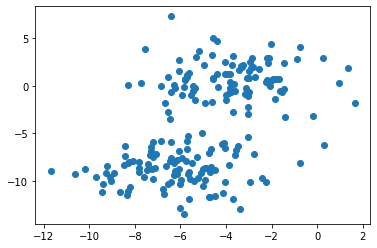

In [9]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples= 200, random_state=17, centers=2 ,cluster_std=2)
plt.scatter(x[:, 0], x[:, 1])

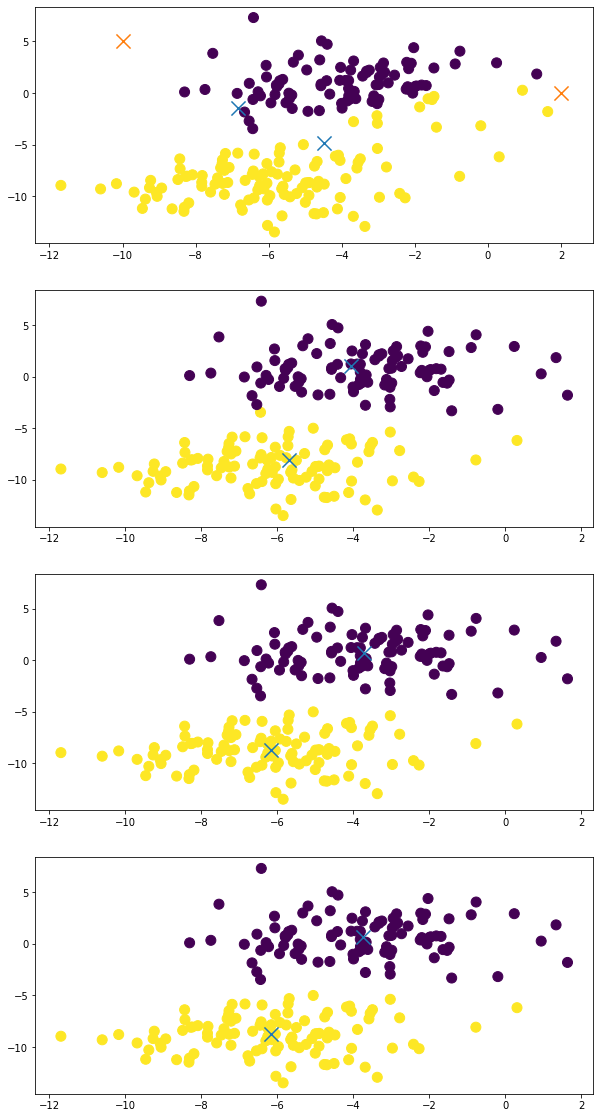

In [10]:
init = np.array([[-10, 5],[2, 0]])
plt.figure(figsize=(10,20))
clust = KMeans(n_clusters=2, init=init, precompute_distances=False, n_init = 1, max_iter=1, algorithm='elkan', random_state=17)
c_pred = clust.fit_predict(x)
plt.subplot(411)
plt.scatter(x[:, 0], x[:, 1], s = 100, c=c_pred)
plt.scatter(clust.cluster_centers_[:, 0], clust.cluster_centers_[:, 1], s = 200, marker='x')
plt.scatter(init[:, 0], init[:, 1], s = 200,  marker='x')

clust = KMeans(n_clusters=2, init=init, precompute_distances=False, n_init = 1, max_iter=2, algorithm='elkan', random_state=17)
c_pred = clust.fit_predict(x)
plt.subplot(412)
plt.scatter(x[:, 0], x[:, 1], s = 100, c=c_pred)
# plt.scatter(init[:, 0], init[:, 1], s = 200,  marker='x')
plt.scatter(clust.cluster_centers_[:, 0], clust.cluster_centers_[:, 1], s = 200, marker='x')

clust = KMeans(n_clusters=2, init=init, precompute_distances=False, n_init = 1, max_iter=3, algorithm='elkan', random_state=17)
c_pred = clust.fit_predict(x)
plt.subplot(413)
plt.scatter(x[:, 0], x[:, 1], s = 100, c=c_pred)
# plt.scatter(init[:, 0], init[:, 1], s = 200,  marker='x')
plt.scatter(clust.cluster_centers_[:, 0], clust.cluster_centers_[:, 1], s = 200, marker='x')

clust = KMeans(n_clusters=2, init=init, precompute_distances=False, n_init = 1, max_iter=4, algorithm='elkan', random_state=17)
c_pred = clust.fit_predict(x)
plt.subplot(414)
plt.scatter(x[:, 0], x[:, 1], s = 100, c=c_pred)
# plt.scatter(init[:, 0], init[:, 1], s = 200,  marker='x')
plt.scatter(clust.cluster_centers_[:, 0], clust.cluster_centers_[:, 1], s = 200, marker='x')

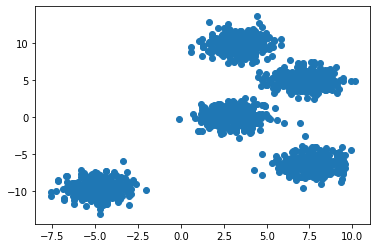

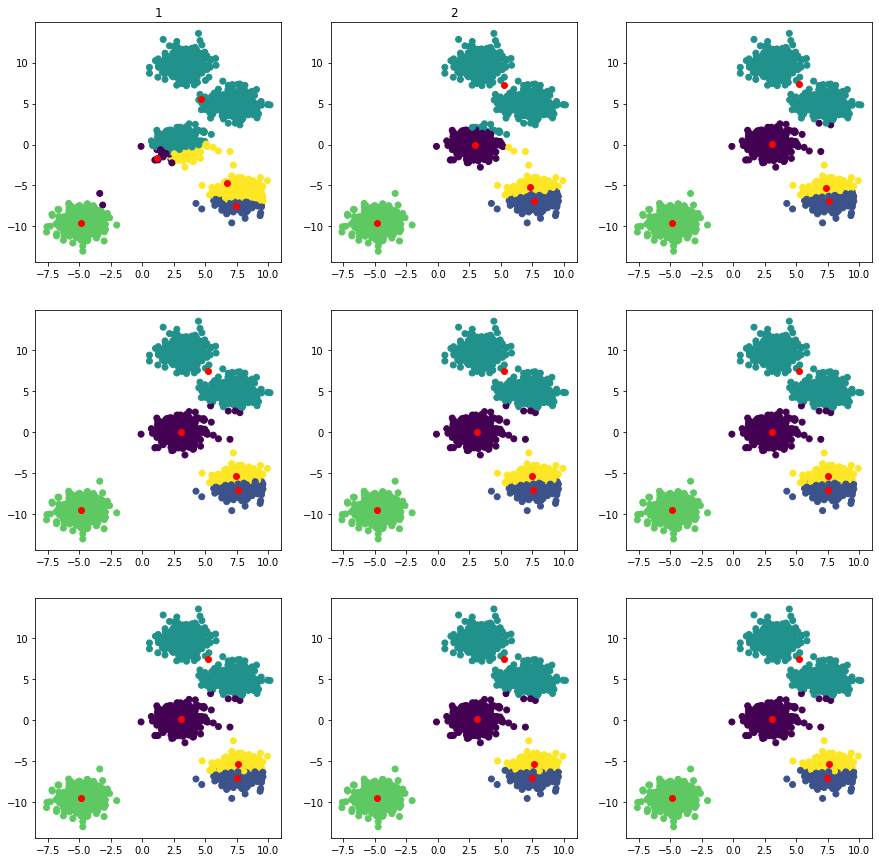

In [11]:
n_samples = 1500
random_state = 18
init = np.array([[-10, -5],[0, 20], [3, 10], [-10, -10], [15, 5]])
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=5 ,cluster_std=1)
plt.scatter(X[:, 0], X[:, 1])
num_clast = 5
rand_st = 100
plt.figure(figsize=(15,15))
plt.subplot(331)
plt.title('1')
kmean = KMeans(n_clusters=num_clast, init=init, n_init=1, max_iter=1, random_state=rand_st, algorithm='elkan')
c_pred = kmean.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=c_pred)
cm = np.ndarray((0,2), dtype=np.float)
for it in np.arange(num_clast):
    cm = np.append(cm, [np.mean(X[np.where(c_pred == it)], axis=0)], axis = 0)
plt.scatter(cm[:,0], cm[:,1], c = 'r')
plt.subplot(332)
plt.title('2')
kmean = KMeans(n_clusters=num_clast, init=init, n_init=1, max_iter=2, random_state=rand_st, algorithm='elkan')
c_pred = kmean.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=c_pred)
cm = np.ndarray((0,2), dtype=np.float)
for it in np.arange(num_clast):
    cm = np.append(cm, [np.mean(X[np.where(c_pred == it)], axis=0)], axis = 0)
plt.scatter(cm[:,0], cm[:,1], c = 'r')
plt.subplot(333)
kmean = KMeans(n_clusters=num_clast, init=init, n_init=1, max_iter=3, random_state=rand_st, algorithm='elkan')
c_pred = kmean.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=c_pred)
cm = np.ndarray((0,2), dtype=np.float)
for it in np.arange(num_clast):
    cm = np.append(cm, [np.mean(X[np.where(c_pred == it)], axis=0)], axis = 0)
plt.scatter(cm[:,0], cm[:,1], c = 'r')
plt.subplot(334)
kmean = KMeans(n_clusters=num_clast, init=init, n_init=1, max_iter=4, random_state=rand_st, algorithm='elkan')
c_pred = kmean.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=c_pred)
cm = np.ndarray((0,2), dtype=np.float)
for it in np.arange(num_clast):
    cm = np.append(cm, [np.mean(X[np.where(c_pred == it)], axis=0)], axis = 0)
plt.scatter(cm[:,0], cm[:,1], c = 'r')
plt.subplot(335)
kmean = KMeans(n_clusters=num_clast, n_init=1, max_iter=5, init=init, random_state=rand_st, algorithm='elkan')
c_pred = kmean.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=c_pred)
cm = np.ndarray((0,2), dtype=np.float)
for it in np.arange(num_clast):
    cm = np.append(cm, [np.mean(X[np.where(c_pred == it)], axis=0)], axis = 0)
plt.scatter(cm[:,0], cm[:,1], c = 'r')
plt.subplot(336)
kmean = KMeans(n_clusters=num_clast, n_init=1, max_iter=6, init=init, random_state=rand_st, algorithm='elkan')
c_pred = kmean.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=c_pred)
cm = np.ndarray((0,2), dtype=np.float)
for it in np.arange(num_clast):
    cm = np.append(cm, [np.mean(X[np.where(c_pred == it)], axis=0)], axis = 0)
plt.scatter(cm[:,0], cm[:,1], c = 'r')
plt.subplot(337)
kmean = KMeans(n_clusters=num_clast, n_init=1, max_iter=7, init=init, random_state=rand_st, algorithm='elkan')
c_pred = kmean.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=c_pred)
cm = np.ndarray((0,2), dtype=np.float)
for it in np.arange(num_clast):
    cm = np.append(cm, [np.mean(X[np.where(c_pred == it)], axis=0)], axis = 0)
plt.scatter(cm[:,0], cm[:,1], c = 'r')
plt.subplot(338)
kmean = KMeans(n_clusters=num_clast, n_init=1, max_iter=8, init=init, random_state=rand_st, algorithm='elkan')
c_pred = kmean.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=c_pred)
cm = np.ndarray((0,2), dtype=np.float)
for it in np.arange(num_clast):
    cm = np.append(cm, [np.mean(X[np.where(c_pred == it)], axis=0)], axis = 0)
plt.scatter(cm[:,0], cm[:,1], c = 'r')
plt.subplot(339)
kmean = KMeans(n_clusters=num_clast, n_init=1, max_iter=19, init=init, random_state=rand_st, algorithm='elkan')
c_pred = kmean.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=c_pred)
cm = np.ndarray((0,2), dtype=np.float)
for it in np.arange(num_clast):
    cm = np.append(cm, [np.mean(X[np.where(c_pred == it)], axis=0)], axis = 0)
plt.scatter(cm[:,0], cm[:,1], c = 'r')

## Сравнение алгоримтов кластеризации

In [12]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import AgglomerativeClustering, KMeans

Text(0.5, 1.0, 'Kmeans')

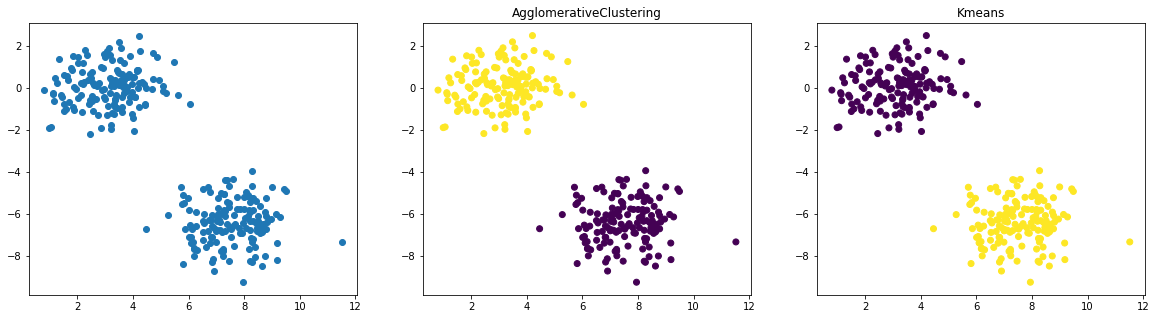

In [13]:
n_samples = 300
random_state = 18
# init = np.array([[-10, -5],[0, 20], [3, 10], [-10, -10], [15, 5]])
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2 ,cluster_std=1)
clf_agglo = AgglomerativeClustering(linkage = 'single')
clf_kmeans = KMeans(n_clusters=2)

plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1])
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c = clf_agglo.fit_predict(X))
plt.title('AgglomerativeClustering')
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c = clf_kmeans.fit_predict(X))
plt.title('Kmeans')

In [ ]:
n_samples = 1000
random_state = 100

# init = np.array([[-10, -5],[0, 20], [3, 10], [-10, -10], [15, 5]])
X, y = make_circles(n_samples=n_samples, noise = 0.1, random_state=random_state, factor=0.1)
clf_agglo = AgglomerativeClustering(linkage = 'single')
clf_kmeans = KMeans(n_clusters=2)

plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1])
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c = clf_agglo.fit_predict(X))
plt.title('AgglomerativeClustering')
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c = clf_kmeans.fit_predict(X))
plt.title('Kmeans')

Text(0.5, 1.0, 'Kmeans')

Text(0.5, 1.0, 'Kmeans')

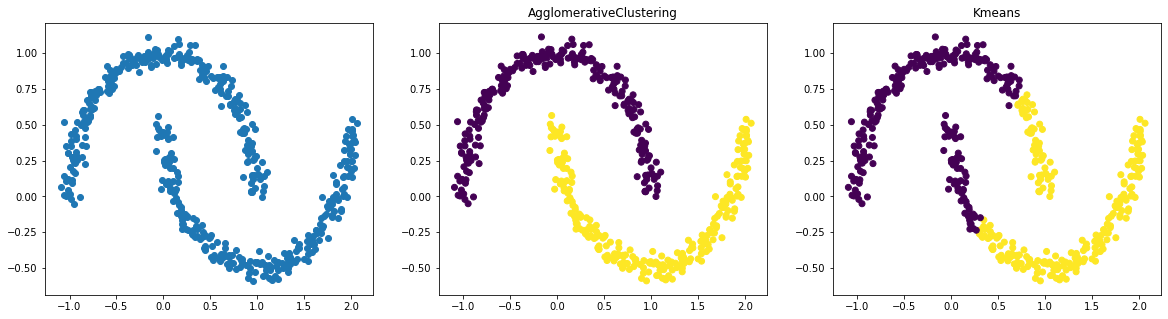

In [15]:
n_samples = 500
random_state = 100

# init = np.array([[-10, -5],[0, 20], [3, 10], [-10, -10], [15, 5]])
X, y = make_moons(n_samples=n_samples, noise = 0.05, random_state=random_state)

clf_agglo = AgglomerativeClustering(linkage = 'single')
clf_kmeans = KMeans(n_clusters=2)

plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1])
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c = clf_agglo.fit_predict(X))
plt.title('AgglomerativeClustering')
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c = clf_kmeans.fit_predict(X))
plt.title('Kmeans')